In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Домашнее задание №1

## Извлекаем данные

In [3]:
fullData = pd.read_csv("data.csv", sep=";")
fullData

,Дата,Заражений за день,Выздоровлений за день,Смертей за день
0,2020-03-12 00:00:00,34,0,0
1,2020-03-13 00:00:00,11,0,0
2,2020-03-14 00:00:00,14,0,0
3,2020-03-15 00:00:00,4,3,0
4,2020-03-16 00:00:00,28,2,0
...,...,...,...,...
1033,2023-01-09 00:00:00,2754,2990,41
1034,2023-01-10 00:00:00,3032,5062,47
1035,2023-01-11 00:00:00,4201,5122,46
1036,2023-01-12 00:00:00,4675,4541,48


In [4]:
col = [fullData.columns[0], fullData.columns[1]]
col

['Дата', 'Заражений за день']

In [5]:
temp = [i for i in range(1, len(fullData[col[0]])+1)]
df = pd.DataFrame({col[0] : temp, col[1] : fullData[col[1]]})
df

,Дата,Заражений за день
0,1,34
1,2,11
2,3,14
3,4,4
4,5,28
...,...,...
1033,1034,2754
1034,1035,3032
1035,1036,4201
1036,1037,4675


## Строим график

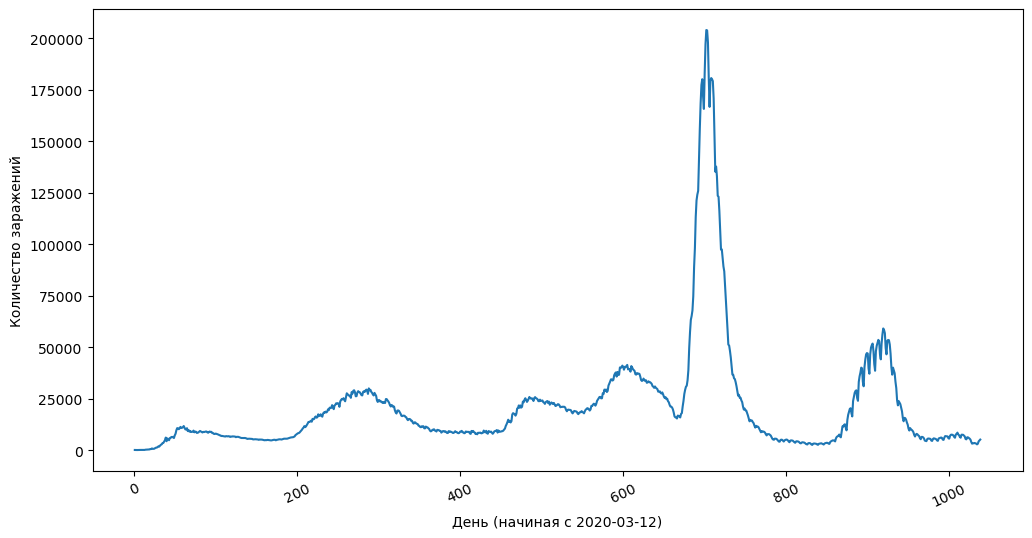

In [6]:
plt.figure(figsize = (12, 6))
plt.plot(df[col[0]], df[col[1]])
plt.xlabel("День (начиная с 2020-03-12)")
plt.ylabel("Количество заражений")
plt.xticks(rotation=25) 
plt.show()

## Расчет спектра

In [7]:
fd = 1 / len(df[col[0]])
spectrum = np.fft.fft(df[col[1]])
freqs = np.fft.fftfreq(len(spectrum), fd)
spectrum = np.fft.fftshift(spectrum)
freqs = np.fft.fftshift(freqs)

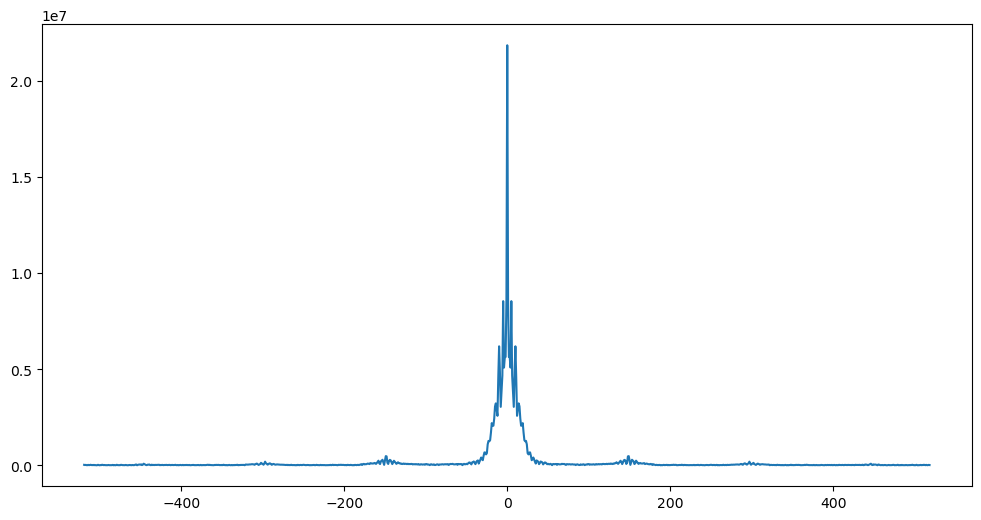

In [8]:
plt.figure(figsize = (12, 6))
plt.plot(freqs, np.abs(spectrum))
plt.show()

(0.0, 20.0)

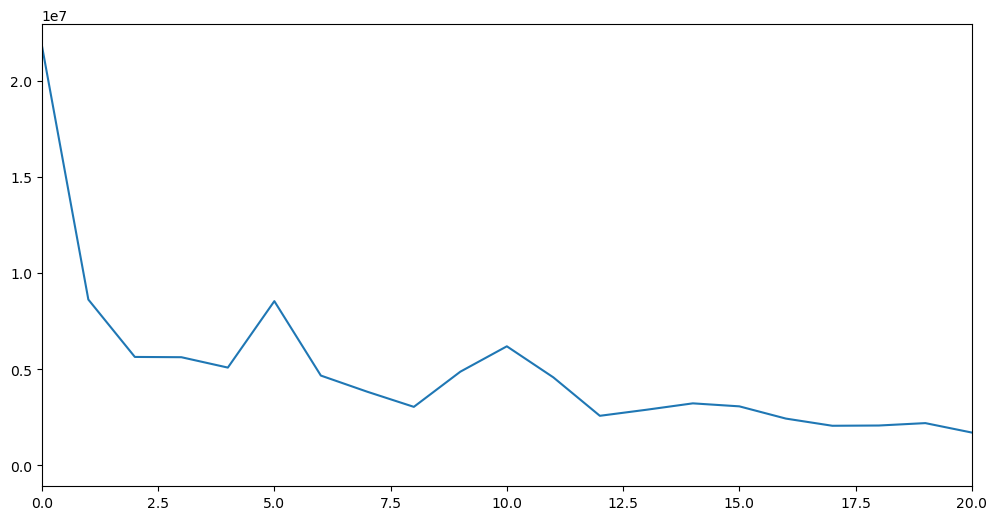

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(freqs, np.abs(spectrum))
plt.xlim(0,20)

## Аппроксимация данных с помощью полинома

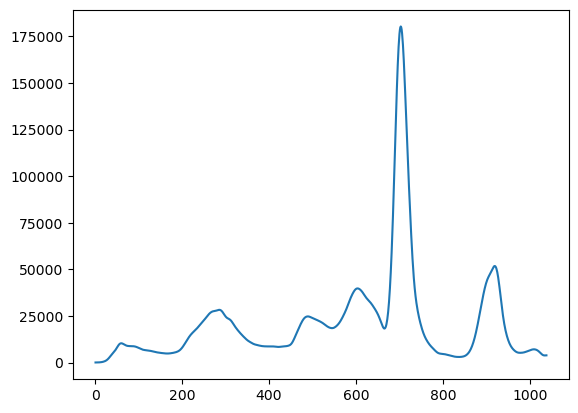

In [10]:
filtered = gaussian_filter1d(df[col[1]], 5)
plt.plot(df[col[0]], filtered)
plt.show()

In [11]:
fitX = list(df[col[0]])

In [12]:
def findFit(x, y):
    
    best_d = 3; prvErr = None
    for d in range(3, 100):
        coefs = np.polyfit(x, y, d)
        poly = np.poly1d(coefs)
        fit = poly(x)
        err = sum((fit - y)**2) / len(y)
        if prvErr == None or err < prvErr:
            best_d = d
            prvErr = err
    
    return best_d

In [13]:
coefs = np.polyfit(fitX, filtered, 59)
poly = np.poly1d(coefs)
fitY = poly(fitX)

/home/ilya/anaconda3/envs/py310/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/ilya/anaconda3/envs/py310/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/tmp/ipykernel_2600/3760068694.py:1: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(fitX, filtered, 59)


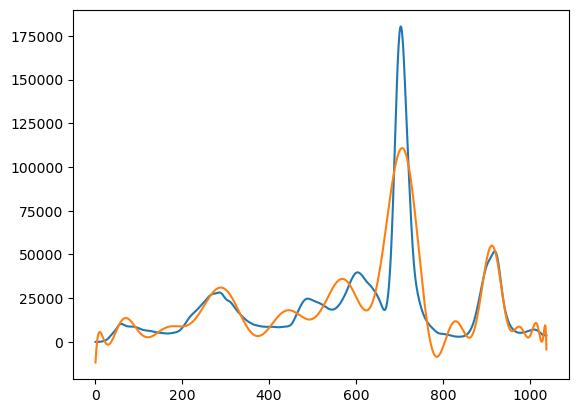

In [14]:
plt.plot(df[col[0]], filtered)
plt.plot(fitX, fitY)
plt.show()

## Ищем пики через производную

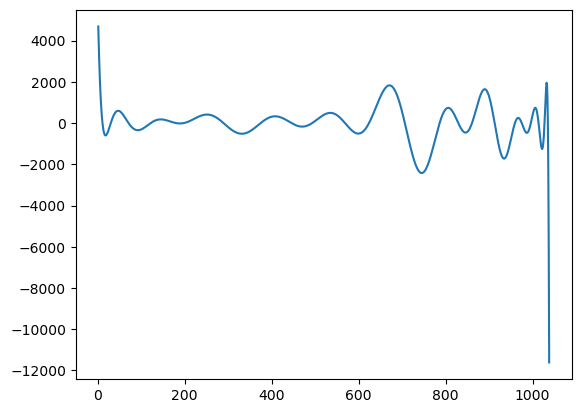

In [15]:
deriv = np.polyder(poly)
derivY = deriv(fitX)
plt.plot(fitX, derivY)
plt.show()

In [16]:
roots = np.roots(deriv)
roots

array([-987.79765396 +76.45086594j, -987.79765396 -76.45086594j,
       -964.35467003+227.68124226j, -964.35467003-227.68124226j,
       -917.86373347+373.95067136j, -917.86373347-373.95067136j,
       -849.05236055+511.99770444j, -849.05236055-511.99770444j,
       -759.05153205+638.64555052j, -759.05153205-638.64555052j,
       -649.29627963+750.82022762j, -649.29627963-750.82022762j,
       -521.51798505+845.52126363j, -521.51798505-845.52126363j,
       -377.71651691+919.86942072j, -377.71651691-919.86942072j,
       -220.04927521+970.9568655j , -220.04927521-970.9568655j ,
        -50.69726749+995.72332924j,  -50.69726749-995.72332924j,
        128.44473562+990.47448844j,  128.44473562-990.47448844j,
        316.56474537+949.62116501j,  316.56474537-949.62116501j,
        517.56365787+860.39431362j,  517.56365787-860.39431362j,
       1034.67896157  +0.j        , 1028.06672873  +0.j        ,
       1012.52996246  +0.j        ,  996.84130057  +0.j        ,
        974.26504304  +0.

In [17]:
extremums = roots.real[abs(roots.imag) == 0]
extremums

array([1034.67896157, 1028.06672873, 1012.52996246,  996.84130057,
        974.26504304,  959.49953519,  912.55259934,  860.4879963 ,
        828.98824299,  785.96463479,  706.06959786,  623.64086864,
        568.54509778,  492.94463685,  445.35617159,  374.40952518,
        289.02195698,  197.46537081,  180.15512567,  121.36130172,
         70.59463424,   29.77980157,   10.672622  ])

In [18]:
e = 1
index = list()
for i, val in enumerate(extremums):
    if poly(val-e) < poly(val) and poly(val+e):
        index.append(i)

In [19]:
fullData[col[0]][list(map(int, extremums[index]))]

1034    2023-01-10 00:00:00
1028    2023-01-04 00:00:00
1012    2022-12-19 00:00:00
996     2022-12-03 00:00:00
974     2022-11-11 00:00:00
912     2022-09-10 00:00:00
828     2022-06-18 00:00:00
706     2022-02-16 00:00:00
568     2021-10-01 00:00:00
445     2021-05-31 00:00:00
289     2020-12-26 00:00:00
180     2020-09-08 00:00:00
70      2020-05-21 00:00:00
10      2020-03-22 00:00:00
Name: Дата, dtype: object

## Аппроксимация с помощью преобразования Фурье 

In [91]:
spectrum = np.fft.fft(df[col[1]])
re = spectrum.real
im = spectrum.imag
f = np.zeros(df.shape[0])
for w in range(int(15)):
    for t in range(df.shape[0]):
        f[t] += ((1 / df.shape[0]) * (abs(spectrum[w]) * np.cos(2 * np.pi / df.shape[0] * w * t  + np.angle(spectrum[w]))))

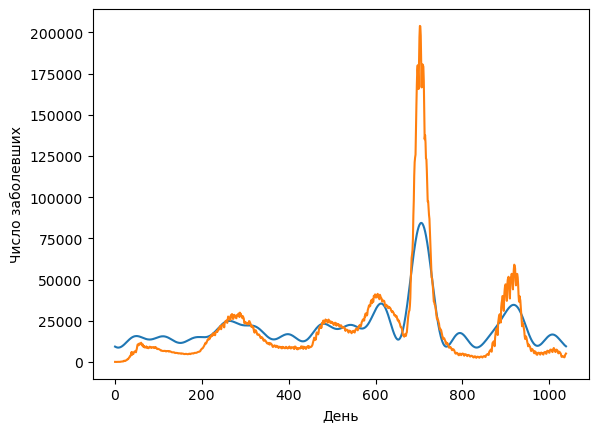

In [92]:
plt.plot(df[col[0]], f)
plt.plot(df[col[0]], df['Заражений за день'])
plt.xlabel('День')
plt.ylabel('Число заболевших');

In [93]:
dif = np.diff(f)
waves_max = []
waves_num = []
print('Дни пиков заражаемости в волнах:')
for i in range(1, len(dif)-1):
    if (abs(dif[i-1]) > abs(dif[i])) & (abs(dif[i+1]) > abs(dif[i])) & (dif[i-1] > 0) & (dif[i+1] < 0):
        print(df[col[0]][i])
        waves_max.append(df[col[0]][i])
        waves_num.append(i)

Дни пиков заражаемости в волнах:
50
111
193
263
309
398
480
542
612
705
793
917
1006
